In [71]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore, shapiro, kstest

import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns

In [10]:
df_sales = pd.read_csv("sales_data.csv")

In [11]:
df_sales.head(5)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
0,36,21,5,2639.886941
1,74,44,10,4707.322227
2,38,44,4,5910.035131
3,52,62,6,6130.742546
4,97,56,2,7516.457681


In [4]:
df_sales.tail(5)

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
95,48,98,5,8966.193011
96,117,17,10,9261.522400
97,66,63,1,3317.040885
98,46,61,4,9868.930518
99,54,99,7,7852.058083


In [12]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_de_experiencia  100 non-null    int64  
 1   numero_de_vendas      100 non-null    int64  
 2   fator_sazonal         100 non-null    int64  
 3   receita_em_reais      100 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 3.3 KB


In [13]:
df_sales.describe()

,tempo_de_experiencia,numero_de_vendas,fator_sazonal,receita_em_reais
count,100.000000,100.000000,100.000000,100.000000
mean,64.490000,54.490000,5.820000,5112.941924
std,32.397935,25.307201,2.836914,2544.731052
min,1.000000,10.000000,1.000000,1133.363948
25%,38.750000,37.500000,4.000000,2800.660516
50%,64.500000,52.500000,5.000000,4953.770034
75%,93.000000,70.500000,8.000000,7079.500163
max,119.000000,100.000000,10.000000,9941.016458


<Axes: ylabel='tempo_de_experiencia'>

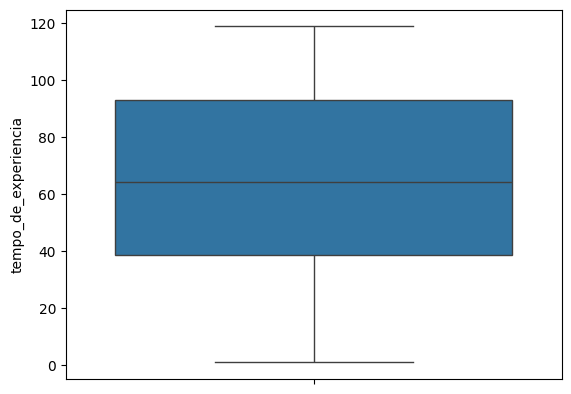

In [38]:
sns.boxplot(df_sales["tempo_de_experiencia"])

<Axes: ylabel='numero_de_vendas'>

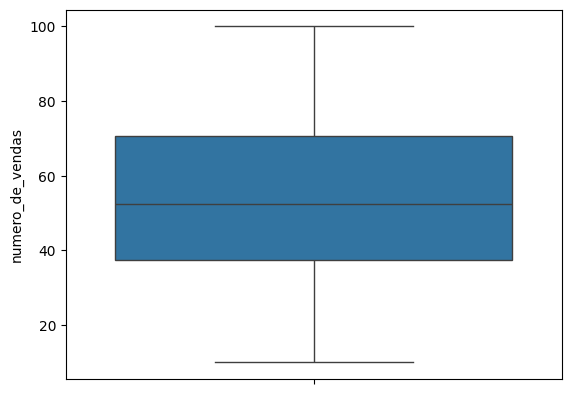

In [39]:
sns.boxplot(df_sales["numero_de_vendas"])

<Axes: ylabel='tempo_de_experiencia'>

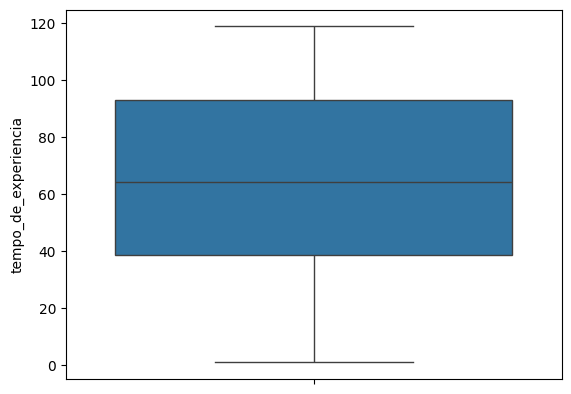

In [41]:
sns.boxplot(df_sales["tempo_de_experiencia"])

<Axes: ylabel='receita_em_reais'>

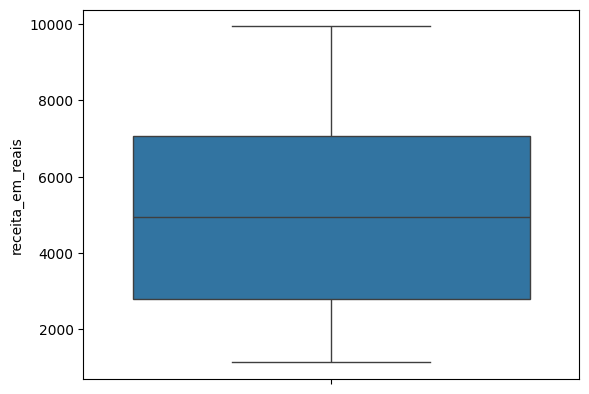

In [42]:
sns.boxplot(df_sales["receita_em_reais"])

<Axes: xlabel='tempo_de_experiencia', ylabel='receita_em_reais'>

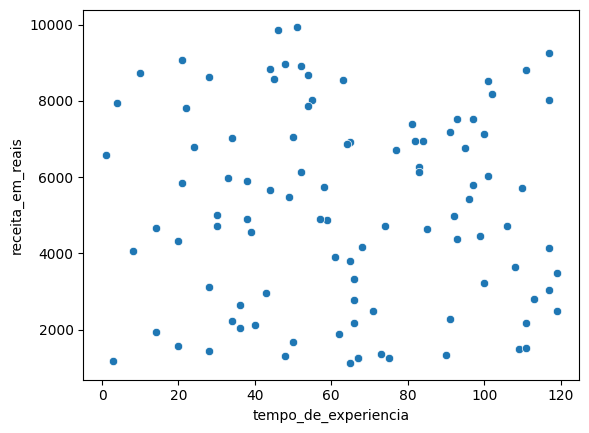

In [43]:
sns.scatterplot(x=df_sales["tempo_de_experiencia"], y=df_sales["receita_em_reais"])

<Axes: xlabel='numero_de_vendas', ylabel='receita_em_reais'>

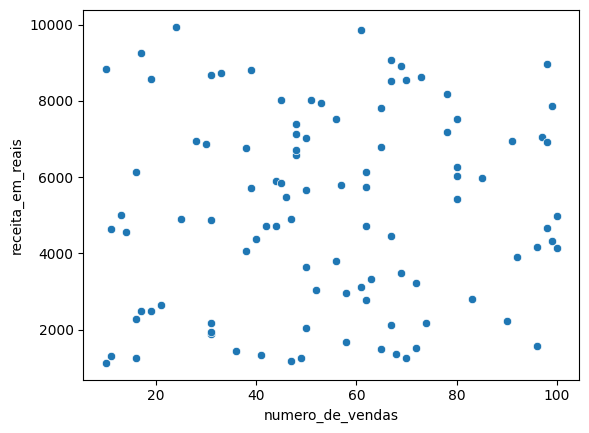

In [44]:
sns.scatterplot(x=df_sales["numero_de_vendas"], y=df_sales["receita_em_reais"])

<Axes: xlabel='fator_sazonal', ylabel='receita_em_reais'>

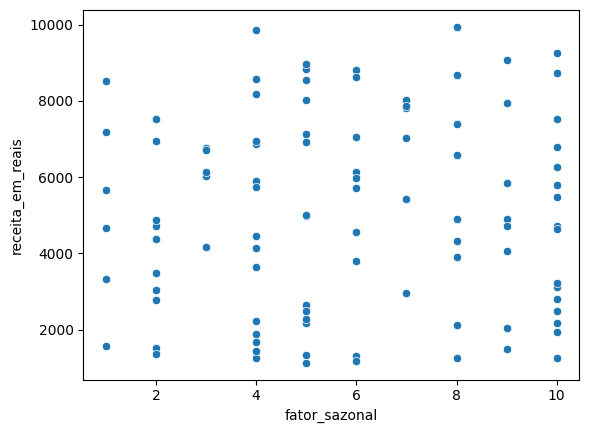

In [45]:
sns.scatterplot(x=df_sales["fator_sazonal"], y=df_sales["receita_em_reais"])

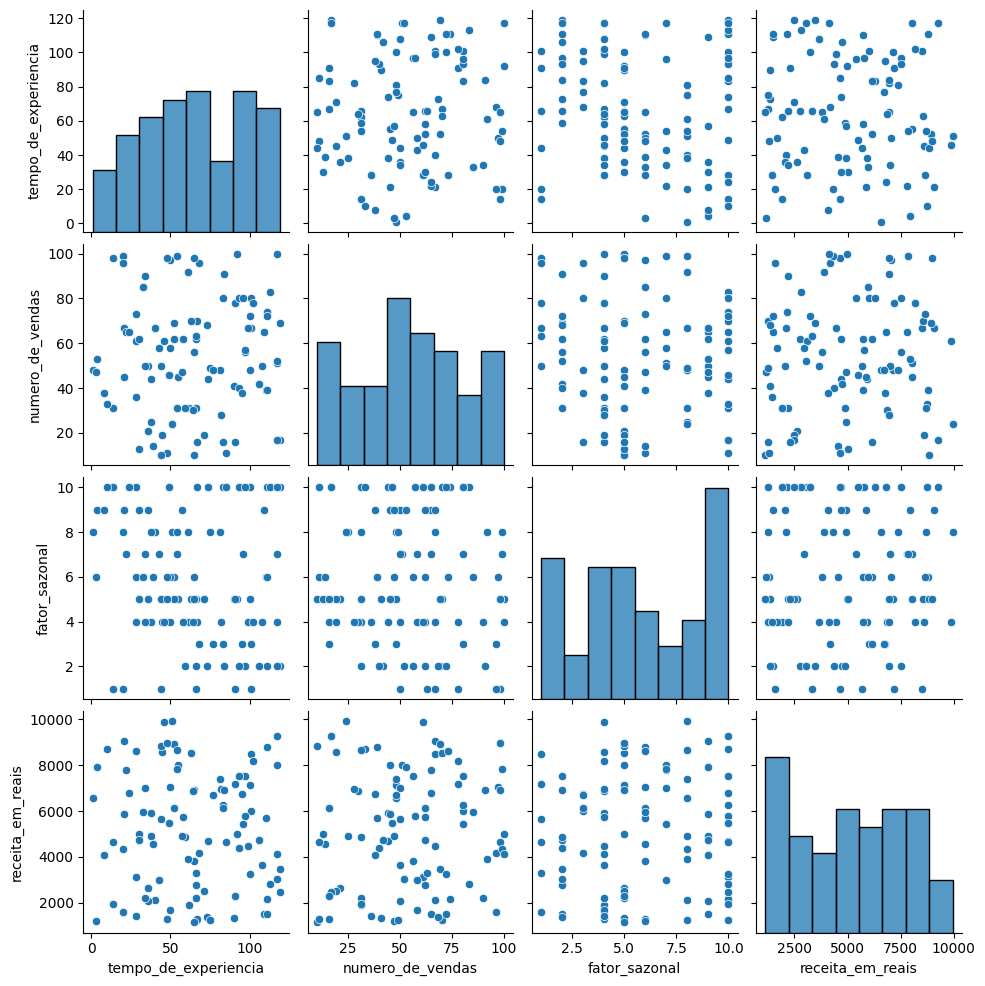

In [46]:
sns.pairplot(df_sales)

<Axes: >

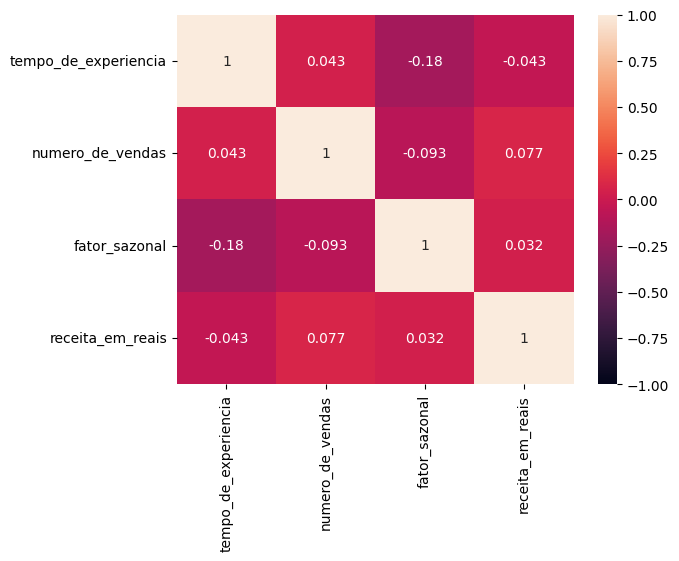

In [26]:
coef_corr_pearson = df_sales.corr(method="pearson")
sns.heatmap(data=coef_corr_pearson, vmin=-1, vmax=1, annot=True)

<Axes: >

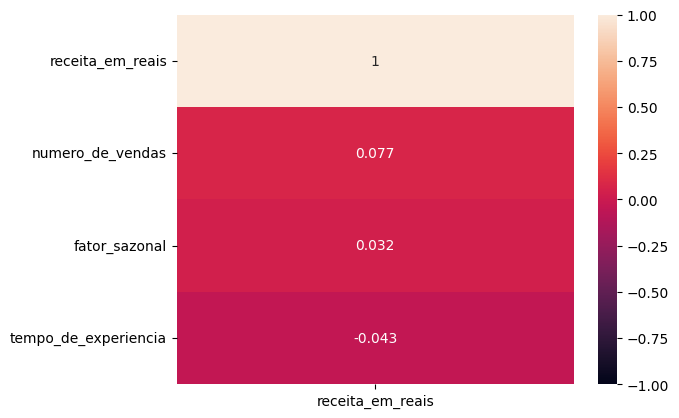

In [34]:
sns.heatmap(data=coef_corr_pearson[["receita_em_reais"]].sort_values(by="receita_em_reais", ascending=False), vmin=-1, vmax=1, annot=True)

<Axes: >

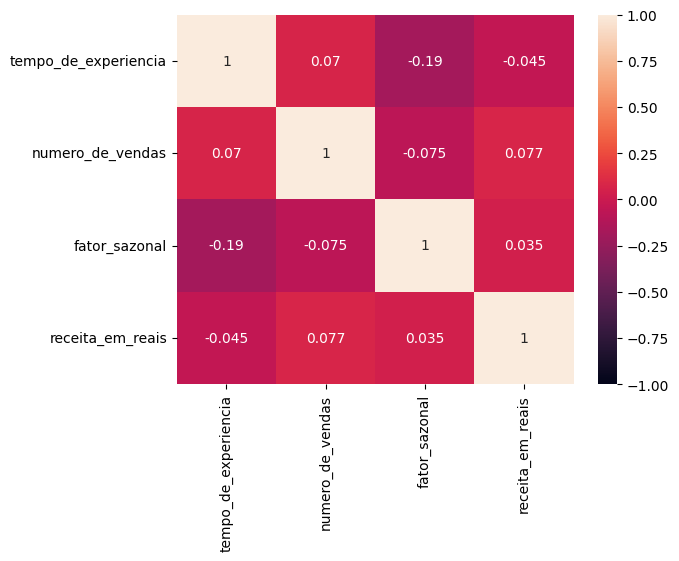

In [35]:
coef_corr_spearman = df_sales.corr(method="spearman")
sns.heatmap(data=coef_corr_spearman, vmin=-1, vmax=1, annot=True)

<Axes: >

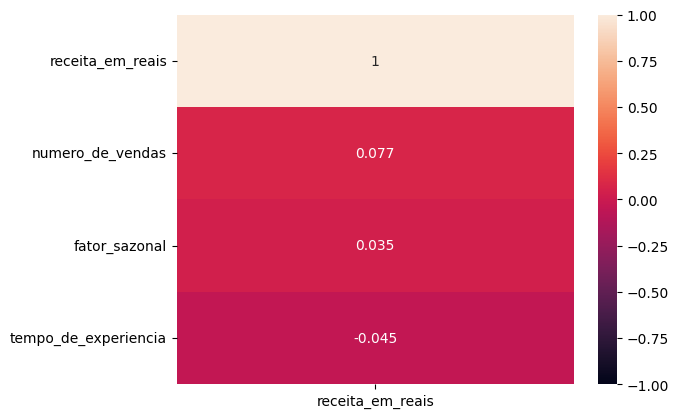

In [36]:
sns.heatmap(data=coef_corr_spearman[["receita_em_reais"]].sort_values(by="receita_em_reais", ascending=False), vmin=-1, vmax=1, annot=True)

### REGRESSÃO LINEAR

In [48]:
X = df_sales.drop(columns=["receita_em_reais", "fator_sazonal"], axis=1)
y = df_sales["receita_em_reais"]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [51]:
model_rl = LinearRegression()
model_rl.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model_rl.predict(X_test)

In [55]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE LINEAR = {mse}")
print(f"R2 LINEAR= {r2}")


MSE LINEAR = 7083471.122061014
R2 LINEAR= -0.2166878208752483


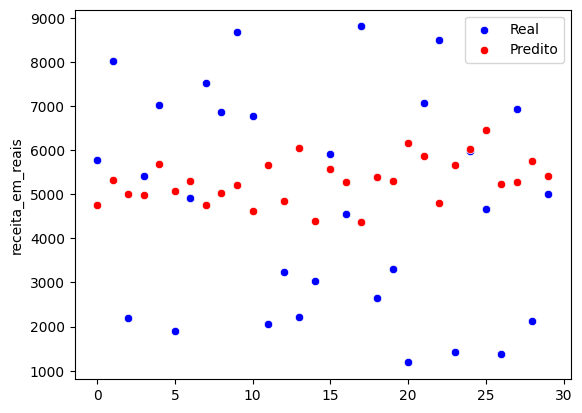

In [69]:
sns.scatterplot(x=range(0, len(y_test)), y=y_test, color="blue")
sns.scatterplot(x=range(0, len(y_test)), y=y_pred, color="red")
plt.legend(["Real", "Predito"])

In [57]:
waste = y_test - y_pred
waste_std = zscore(waste)

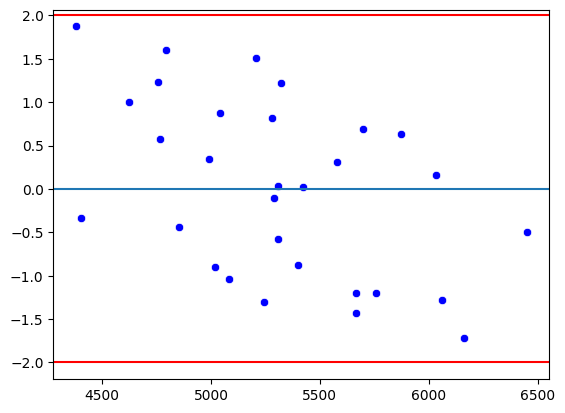

In [70]:
sns.scatterplot(x=y_pred, y=waste_std, color="blue")
plt.axhline(y=0)
plt.axhline(y=-2, color="red")
plt.axhline(y=2, color="red")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

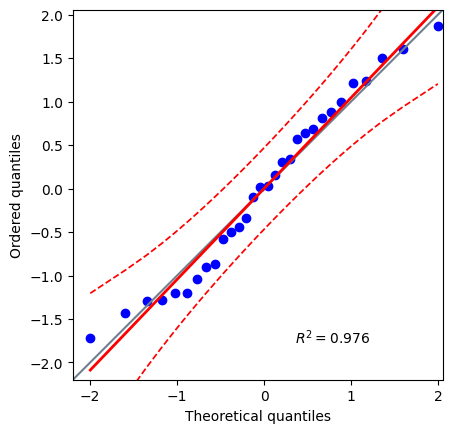

In [63]:
pg.qqplot(waste_std, dist="norm", confidence=0.95)

In [72]:
stat_shapiro, p_value_shapiro = shapiro(waste)
print(f"Estatística do teste: {stat_shapiro} e P-value: {p_value_shapiro}")

Estatística do teste: 0.963143777344194 e P-value: 0.37174470967266776


In [73]:
stat_ks, p_value_ks = kstest(waste, "norm")
print(f"Estatística do teste: {stat_ks} e P-value: {p_value_ks}")

Estatística do teste: 0.5666666666666667 e P-value: 1.255521932565949e-09


### REGRESSÃO POLINOMIAL

In [79]:
X_poly = df_sales.drop(columns=["receita_em_reais"], axis=1)
y_poly = df_sales["receita_em_reais"]

In [81]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_poly, train_size=0.7, random_state=51)

In [82]:
feat_poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = feat_poly.fit_transform(X_poly_train)
X_poly_test = feat_poly.transform(X_poly_test)

In [83]:
feat_poly.feature_names_in_

array(['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal'],
      dtype=object)

In [84]:
feat_poly.get_feature_names_out(feat_poly.feature_names_in_)

array(['tempo_de_experiencia', 'numero_de_vendas', 'fator_sazonal',
       'tempo_de_experiencia^2', 'tempo_de_experiencia numero_de_vendas',
       'tempo_de_experiencia fator_sazonal', 'numero_de_vendas^2',
       'numero_de_vendas fator_sazonal', 'fator_sazonal^2'], dtype=object)

In [86]:
model_rp = LinearRegression()
model_rp.fit(X_poly_train, y_poly_train)

LinearRegression()

In [88]:
y_poly_pred = model_rp.predict(X_poly_test)

In [89]:
mse_poly = mean_squared_error(y_poly_test, y_poly_pred)
r2_poly = r2_score(y_poly_test, y_poly_pred)

print(f"MSE LINEAR = {mse}")
print(f"R2 LINEAR= {r2}")


MSE LINEAR = 7083471.122061014
R2 LINEAR= -0.2166878208752483


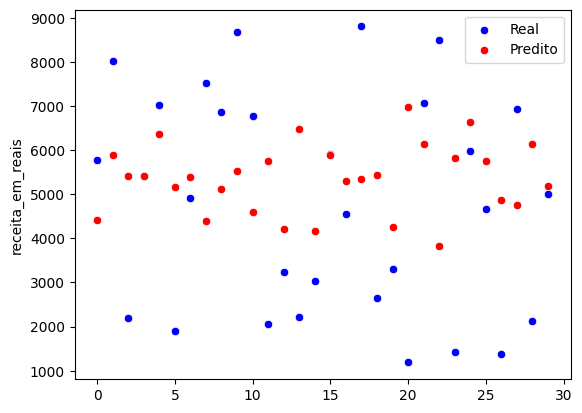

In [100]:
sns.scatterplot(x=range(0, len(y_poly_test)), y=y_poly_test, color="blue")
sns.scatterplot(x=range(0, len(y_poly_test)), y=y_poly_pred, color="red")
plt.legend(["Real", "Predito"])

In [92]:
waste_poly = y_poly_test - y_poly_pred
waste_poly_std = zscore(waste_poly)

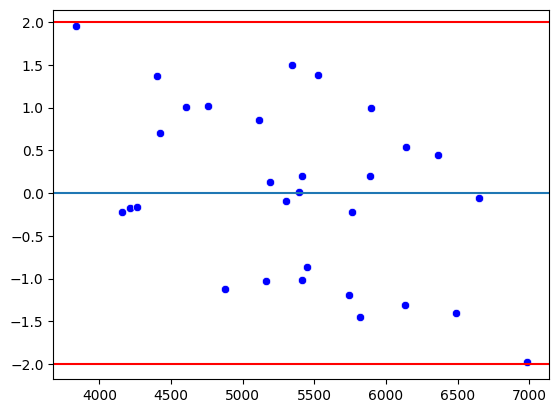

In [93]:
sns.scatterplot(x=y_poly_pred, y=waste_poly_std, color="blue")
plt.axhline(y=0)
plt.axhline(y=-2, color="red")
plt.axhline(y=2, color="red")

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

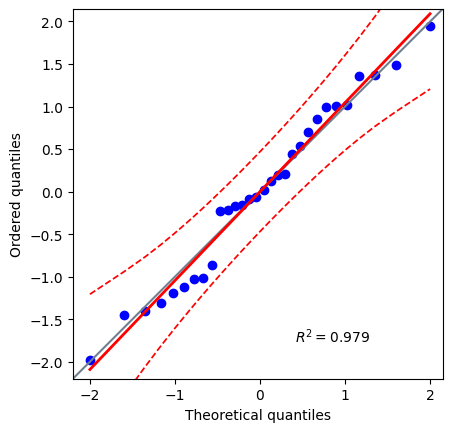

In [95]:
pg.qqplot(waste_poly, dist="norm", confidence=0.95)

In [96]:
stat_shapiro_poly, p_value_shapiro_poly = shapiro(waste_poly)
print(f"Estatística do teste: {stat_shapiro_poly} e P-value: {p_value_shapiro_poly}")

Estatística do teste: 0.9708721788477068 e P-value: 0.5633076070413751


In [97]:
stat_ks_poly, p_value_ks_poly = kstest(waste_poly, "norm")
print(f"Estatística do teste: {stat_ks_poly} e P-value: {p_value_ks_poly}")

Estatística do teste: 0.5666666666666667 e P-value: 1.255521932565949e-09


### COMPARAÇÃO ENTRE OS DOIS MODELOS

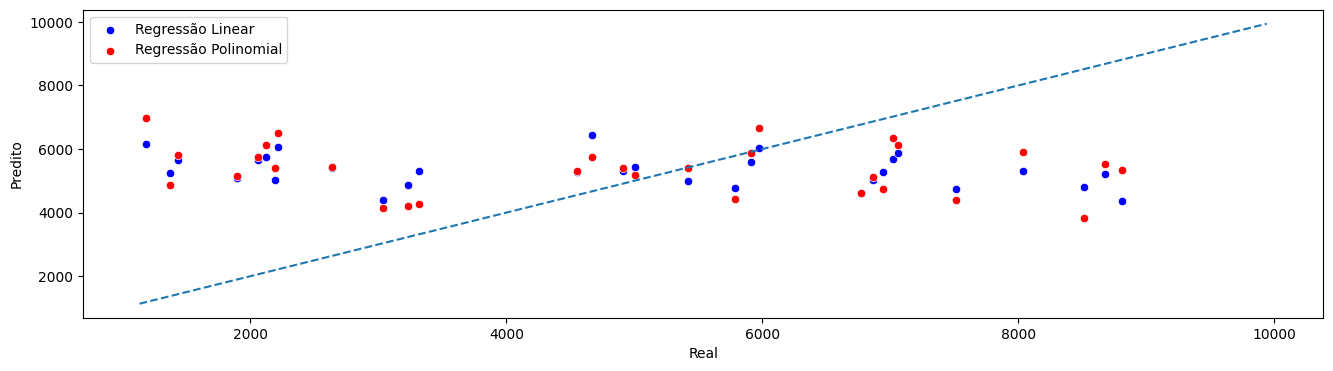

In [113]:
plt.figure(figsize=(16, 4))
sns.scatterplot(x=y_test, y=y_pred, color="blue")
sns.scatterplot(x=y_poly_test, y=y_poly_pred, color="red")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "--")
plt.xlabel('Real')
plt.ylabel('Predito')
plt.legend(["Regressão Linear", "Regressão Polinomial"])

In [128]:
experience_time = 51
number_of_sales = 40
seasonal_factor = 8

input_rl = pd.DataFrame([[experience_time, number_of_sales]], columns=["tempo_de_experiencia", "numero_de_vendas"])
input_rp = pd.DataFrame([[experience_time, number_of_sales,seasonal_factor]], columns=["tempo_de_experiencia", "numero_de_vendas", "fator_sazonal"])

linear_expected_revenue_rl = model_rl.predict(input_rl)
linear_expected_revenue_rp = model_rp.predict(feat_poly.transform(input_rp))

In [129]:
print(f"Receita prevista (Regressão Linear): R${linear_expected_revenue_rl[0]:.2f}")
print(f"Receita prevista (Regressão Polinomial): R${linear_expected_revenue_rp[0]:.2f}")

Receita prevista (Regressão Linear): R$5337.14
Receita prevista (Regressão Polinomial): R$5736.44
